In [1]:
'''pregnancies
glucose
blood pressure
skin thickness
insulin
BMI
Diabetes Pedigree Function
Age
Outcome'''

'pregnancies\nglucose\nblood pressure\nskin thickness\ninsulin\nBMI\nDiabetes Pedigree Function\nAge\nOutcome'

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import copy

In [3]:
# data preparation

## training data
X_train_df = pd.read_csv('../../Dataset/diabetes/Diabetes_Xtrain.csv')
Y_train_df = pd.read_csv('../../Dataset/diabetes/Diabetes_Ytrain.csv')

X_train = X_train_df.values
Y_train = Y_train_df.values
Y_train = Y_train[:,0]

In [4]:
# data understanding
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               576 non-null    int64  
 1   Glucose                   576 non-null    int64  
 2   BloodPressure             576 non-null    int64  
 3   SkinThickness             576 non-null    int64  
 4   Insulin                   576 non-null    int64  
 5   BMI                       576 non-null    float64
 6   DiabetesPedigreeFunction  576 non-null    float64
 7   Age                       576 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 36.1 KB


In [5]:
Y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Outcome  576 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [6]:
np.unique(Y_train)

array([0, 1], dtype=int64)

In [7]:
## testing data
X_test_df = pd.read_csv('../../Dataset/diabetes/Diabetes_Xtest.csv')

X_test = X_test_df.values

In [8]:
# knn function
def dist(x1, x2):
    return np.sqrt(sum((x1 - x2)**2))

def knn(X, Y, queryPoint, k = 7):
    
    val = []
    size = X.shape[0]
    
    for i in range(size):
        d = dist(queryPoint, X[i])
        val.append((d, Y[i]))
        
    val = sorted(val)
    
    # take first k value
    val = val[:k]
    
    # convert list to numpy array
    val = np.array(val)
    
    # find unique output and there frequency
    counts = np.unique(val[:,1], return_counts=True)
    
    index = counts[1].argmax()
    pred = counts[0][index]
    
    return pred

In [9]:
knn(X_train, Y_train, X_test[0])

1.0

In [10]:
# exporting all the predictions as csv
test_size = X_test.shape[0]
lst = []

for i in range(test_size):
    pred = knn(X_train, Y_train, X_test[i])
    lst.append(int(pred))
    print("", i, end = "\r")
    
outcome = {
    "outputs": np.array(lst)
}

df = pd.DataFrame(outcome, dtype = 'uint8')
df.to_csv('output.csv', index = False)

In [11]:
from sklearn.model_selection import train_test_split
import tqdm

In [12]:
Xt, Xv, Yt, Yv = train_test_split(X_train, Y_train, test_size=0.2)

In [13]:
Yp_knn = []
for i in range(Xv.shape[0]):
    pred = knn(Xt, Yt, Xv[i])
    Yp_knn.append(int(pred))
    
Yp_knn = np.asarray(Yp_knn)

# classification using neural network (MLP)

In [14]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [15]:
mlp_model = Sequential()
mlp_model.add(Input(X_train.shape[1]))
mlp_model.add(Dense(24, activation='relu'))
mlp_model.add(Dense(24, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid')) # its binary classification problem
mlp_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [16]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=9, restore_best_weights=True)

In [17]:
# print("no of samples: %d" %X_train.shape[0])
hist = mlp_model.fit(Xt, Yt, epochs=90, validation_split=0.2, use_multiprocessing=True, callbacks=[early_stop])

Epoch 1/90
12/12 [==============================] - 2s 34ms/step - loss: 6.6420 - accuracy: 0.4538 - val_loss: 3.3426 - val_accuracy: 0.4891
Epoch 2/90
12/12 [==============================] - 0s 13ms/step - loss: 3.1321 - accuracy: 0.4891 - val_loss: 2.2981 - val_accuracy: 0.4783
Epoch 3/90
12/12 [==============================] - 0s 12ms/step - loss: 2.3412 - accuracy: 0.4484 - val_loss: 1.9147 - val_accuracy: 0.4348
Epoch 4/90
12/12 [==============================] - 0s 18ms/step - loss: 1.7880 - accuracy: 0.5598 - val_loss: 1.4583 - val_accuracy: 0.5543
Epoch 5/90
12/12 [==============================] - 0s 14ms/step - loss: 1.3201 - accuracy: 0.5516 - val_loss: 1.2181 - val_accuracy: 0.6087
Epoch 6/90
12/12 [==============================] - 0s 11ms/step - loss: 1.1247 - accuracy: 0.6250 - val_loss: 1.2358 - val_accuracy: 0.5978
Epoch 7/90
12/12 [==============================] - 0s 13ms/step - loss: 0.9846 - accuracy: 0.6304 - val_loss: 1.0070 - val_accuracy: 0.6196
Epoch 8/90
12

In [18]:
plt.style.use('dark_background')

In [19]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

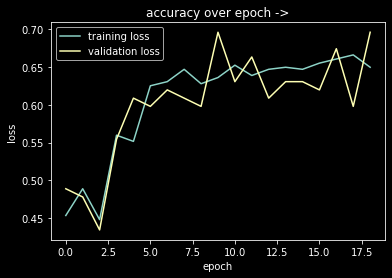

In [20]:
# the accuracy on validation set is just about 70%
# which is not great at all

plt.plot(hist.history['accuracy'], label="training loss")
plt.plot(hist.history['val_accuracy'], label="validation loss")
plt.title("accuracy over epoch ->")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

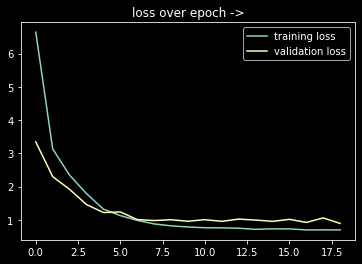

In [21]:
plt.plot(hist.history['loss'], label="training loss")
plt.plot(hist.history['val_loss'], label="validation loss")
plt.title('loss over epoch ->')
plt.legend()
plt.show()

In [22]:
Yp_mlp = mlp_model.predict_on_batch(Xv)

In [23]:
print(Yp_knn.shape, Yp_mlp.shape)

(116,) (116, 1)


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr_model = LogisticRegression(solver='liblinear')

In [26]:
print(X_train.shape, Y_train.shape)

(576, 8) (576,)


In [27]:
lr_model.fit(Xt, Yt)

LogisticRegression(solver='liblinear')

In [28]:
theta0 = lr_model.intercept_
thetas = lr_model.coef_

In [29]:
print(theta0, thetas)

[-5.14645887] [[ 1.03488099e-01  2.62412769e-02 -1.07947140e-02  2.53835281e-04
  -1.41313714e-03  4.71521581e-02  5.99990581e-01 -6.77830897e-04]]


In [30]:
Yp_lr = lr_model.predict(Xv)

In [31]:
Yp_lr = Yp_lr.reshape(-1, 1)

In [32]:
print(Yp_lr.shape)

(116, 1)


# Decision Tree - SkLearn

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
#from sklearn.metrics import 

In [34]:
sk_decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)

In [35]:
sk_decision_tree.fit(Xt, Yt)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [36]:
sk_decision_tree.score(Xv, Yv)

0.6982758620689655

# Decision Tree

In [37]:
def entropy(Y):
    total = Y.shape[0]
    counts = np.unique(Y, return_counts=True)[1]
    probs = np.asarray(counts) / total
    randomness = -1.0 * np.sum(probs*np.log2(probs))
    
    return randomness
    
# helper function - split dataset along a feature 
def divide_data(X, Y, split_key):
    """
    func desc; divide data is a helper function that splits data along the split_key
    params; X: feature values of the dataset
    params; Y: labels of the dataset
    params; split_key: the index of a feature to split the dataset
    """
    X_left, X_right = [], []
    Y_left, Y_right = [], []
    
    for i in range(X.shape[0]):
        if X[i, split_key] > np.mean(X[:, split_key]):
            X_right.append(X[i])
            Y_right.append(Y[i])
        else:
            X_left.append(X[i])
            Y_left.append(Y[i])
    
    return np.asarray(X_left), np.asarray(Y_left), np.asarray(X_right), np.asarray(Y_right)
    
def info_gain(X, Y, split_key):
    X_left, Y_left, X_right, Y_right = divide_data(X, Y, split_key)
    
    # this is a leaf case - all data are in one side
    if X_left.shape[0] == 0 or X_right.shape[0] == 0:
        # here info gain is neglibile(-infinity)
        return -1000000

    left_ig = (Y_left.shape[0] / Y.shape[0]) * entropy(Y_left)
    right_ig = (Y_right.shape[0] / Y.shape[0]) * entropy(Y_right)

    ig = entropy(Y) - left_ig - right_ig
    return ig

In [38]:
igs = []

for i in range(Xt.shape[1]):
    ig = info_gain(Xt, Yt, i)
    igs.append(ig)

In [39]:
np.argmax(igs)

1

In [40]:
class DecisionTree:
    def __init__(self, max_depth=5):
        self.depth = 0
        self.max_depth = max_depth
        self.left = None
        self.right = None
        self.target = None
        self.split_key = None # this will help while predicting how to make decision
        self.split_val = None
        
    def train(self, X, Y):
        # stop condition
        if self.depth >= self.max_depth:
            if Y.mean() > 0.5:
                self.target = 1
            else:
                self.target = 0
            return
        
        igs = []
        for i in range(X.shape[1]):
            ig = info_gain(X, Y, i)
            igs.append(ig)
            
        self.split_key = np.argmax(igs)
        self.split_val = np.mean(X[:, self.split_key])
        
        X_left, Y_left, X_right, Y_right = divide_data(X, Y, self.split_key)
        
        #check if no more split are possible i.e., all data are in one side (either 0 or 1)
        if Y_left.shape[0] * Y_right.shape[0] == 0:
            if np.mean(Y) < 0.5:
                self.target = 0
            else:
                self.target = 1
            return
        
        self.left = DecisionTree(max_depth = self.max_depth-1)
        # return X_left, Y_left, X_right, Y_right
        self.left.train(X_left, Y_left)
        
        
        self.right = DecisionTree(max_depth = self.max_depth-1)
        self.right.train(X_right, Y_right)
        
        # making decision/target at every node
        if np.mean(Y) >= 0.5:
            self.target = 1
        else:
            self.target = 0
        return
    
    def predict(self, X):
        Yp = []
        #print(self.split_key, self.split_val, end=" ")
        if X[self.split_key] > self.split_val:
            #print("right: {}".format(self.right))
            if self.right.split_key is None:
                return self.target 
                Yp.append(self.target)
            else:
                return self.right.predict(X)
        else:
            #print("right: {}".format(self.right))
            if self.left.split_key is None:
                
                return self.target
                Yp.append(self.target)
            else:
                return self.left.predict(X)

In [41]:
decision_tree = DecisionTree(7)

In [42]:
decision_tree.train(Xt, Yt)

In [43]:
Yp_dt = np.zeros(Yv.shape, dtype=int)

for i in range(Xv.shape[0]):
    Yp_dt[i] = decision_tree.predict(Xv[i])    

In [44]:
Yp_dt

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0])

# Support Vector Machine

In [45]:
from sklearn import svm

In [46]:
svc = svm.SVC(kernel='linear')

In [47]:
svc.fit(Xt, Yt)

SVC(kernel='linear')

In [48]:
svc.score(Xt, Yt)

0.7869565217391304

In [49]:
Yp_svm = svc.predict(Xv)

In [50]:
svc.score(Xv, Yv)

0.7844827586206896

# SVM - rbf and polynomial kernel

In [51]:
svc_rgb = svm.SVC(kernel='rbf')
svc_rgb.fit(Xt, Yt)

SVC()

In [52]:
svc_rgb.score(Xv, Yv)

0.7844827586206896

In [53]:
svc_poly = svm.SVC(kernel='poly')
svc_poly.fit(Xt, Yt)

SVC(kernel='poly')

In [54]:
svc_poly.score(Xv, Yv)

0.7672413793103449

In [55]:
svc_sigmoid = svm.SVC(kernel='sigmoid')
svc_sigmoid.fit(Xt, Yt)

SVC(kernel='sigmoid')

In [56]:
svc_sigmoid.score(Xv, Yv)

0.5172413793103449

# Random Forest (also known as Tree Forest, and Many Tree)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [58]:
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy')

In [59]:
"""rf_model.fit(X, Y)
rf_model.score(X, Y)
rf_model.score(Xt, Yt)
"""
# we can use fit function to train the model, however we will use some of training data for validation

'rf_model.fit(X, Y)\nrf_model.score(X, Y)\nrf_model.score(Xt, Yt)\n'

In [60]:
acc = cross_val_score(rf_model, Xt, Yt, cv=5, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [61]:
acc

array([0.76086957, 0.72826087, 0.7173913 , 0.76086957, 0.72826087])

In [62]:
rf_model.fit(Xt, Yt)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [63]:
rf_model.score(Xt, Yt)

0.9869565217391304

In [64]:
# accuracy on test set
rf_model.score(Xv, Yv)

0.7241379310344828

# Random Forest of n trees - cross validation

In [65]:
train_acc = []
val_acc = []
for i in range(1, 30):
    # best random forest model
    brf_model = RandomForestClassifier(n_estimators=i, max_depth=5, criterion='entropy')
    brf_model.fit(Xt, Yt) # Xt - train set
    train_acc.append(brf_model.score(Xt, Yt))
    val_acc.append(brf_model.score(Xv, Yv))

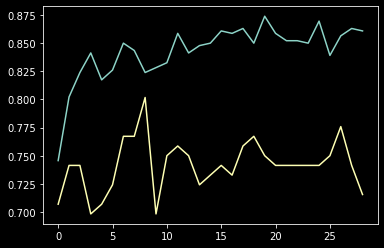

In [66]:
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

In [67]:
print("optimial no. of trees for random-forest is %d" %np.argmax(val_acc))

optimial no. of trees for random-forest is 8


In [68]:
# Now i will use cross validation on 6 tree forest to find the best model

In [69]:
from sklearn.model_selection import cross_validate

In [70]:
brf_model = RandomForestClassifier(n_estimators=6, max_depth=5, criterion='entropy')

In [71]:
X_train.shape

(576, 8)

In [72]:
scores = cross_validate(brf_model, X_train, Y_train, cv=5, return_estimator=True)

In [73]:
scores

{'fit_time': array([0.01564217, 0.01562047, 0.        , 0.        , 0.01559806]),
 'score_time': array([0.        , 0.01562595, 0.01559448, 0.01565194, 0.        ]),
 'estimator': [RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=6),
  RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=6),
  RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=6),
  RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=6),
  RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=6)],
 'test_score': array([0.75      , 0.79130435, 0.75652174, 0.73043478, 0.79130435])}

In [74]:
cv_rfmodel = scores['estimator'][1]

In [75]:
Y_testp = cv_rfmodel.predict(X_test)

The best accuracy achieved through random forest is ~80%

# Decision Tree Random Forest from Scratch - Numpy

In [76]:
class RandomForest:
    def __init__(self):
        return
    
    def bagging(self):
        return

# Decision tree - Adaboost 

In [77]:
class AdaboostTree:
    def __init__(self, X, Y):
        self.X = X
        self.Y = np.where(Y == 0, -1, 1)
        self.ds = [] # placeholder for decision stumps (week learners) 
    
    def error(self, Yp, p):
        d = np.where(self.Y == Yp, 0, 1) # d is 1 when predicted Y is not same as actual Y
        return np.sum(p * d)
    
    def train(self, M = 10):
        """
        params; M: no of decision stumps (weak learner) the model will create
        return; 
        """
        N = self.X.shape[0]
        p = np.ones(N,) / N # probablity of getting nth sample
        for m in range(M):
            dt = DecisionTree(max_depth=1)
            dt.train(self.X, self.Y)
            
            # Y prediction by weak learner
            Yp = np.zeros(self.Y.shape, dtype=int)
            for n in range(N):
                yp = dt.predict(self.X[n])
                if yp == 0: Yp[n] = -1
                else: Yp[n] = 1
            #return Yp
            # error made by the weak learner
            e = self.error(Yp, p) # error
            beta = (1-e) / e
            
            c = np.log(beta) # contribution/vote of the decision tree
            
            # probablity for new decision tree/stump
            d = np.where(self.Y == Yp, -1, 1)
            # p = p * np.power(beta, d)
            p = p * np.exp(d*c)
            p = p / np.sum(p) # normalization (since probablity should sum to 1)
            
            self.ds.append([dt, c])
            print("tree: {}, error: {}, vote: {}".format(m, e, c))
            
        
    def predict(self, Xt):
        M = len(self.ds)
        N = Xt.shape[0]
        Yp = np.zeros(N, )

        for m in range(M):
            
            for n in range(N):
                yp = self.ds[m][0].predict(self.X[n])
                if yp == 0: Yp[n] -= self.ds[m][1]
                else: Yp[n] += self.ds[m][1]
                    
        return Yp
                
        

In [78]:
adboost_model = AdaboostTree(Xt, Yt)

In [79]:
Yp = adboost_model.train()

tree: 0, error: 0.3521739130434783, vote: 0.6094971512730204
tree: 1, error: 0.6478260869565218, vote: -0.6094971512730206
tree: 2, error: 0.35217391304347817, vote: 0.6094971512730207
tree: 3, error: 0.647826086956522, vote: -0.6094971512730214
tree: 4, error: 0.352173913043478, vote: 0.6094971512730215
tree: 5, error: 0.6478260869565218, vote: -0.6094971512730206
tree: 6, error: 0.3521739130434784, vote: 0.6094971512730197
tree: 7, error: 0.6478260869565214, vote: -0.6094971512730192
tree: 8, error: 0.35217391304347867, vote: 0.6094971512730185
tree: 9, error: 0.6478260869565213, vote: -0.6094971512730185


In [80]:
Yp_adaboost = adboost_model.predict(Xv)

In [81]:
Yp_adaboost

array([-5.55111512e-16, -5.55111512e-16, -5.55111512e-16, -5.55111512e-16,
       -5.55111512e-16, -5.55111512e-16, -5.55111512e-16, -5.55111512e-16,
       -5.55111512e-16, -5.55111512e-16, -5.55111512e-16, -5.55111512e-16,
       -5.55111512e-16, -5.55111512e-16, -5.55111512e-16, -5.55111512e-16,
       -5.55111512e-16, -5.55111512e-16, -5.55111512e-16, -5.55111512e-16,
       -5.55111512e-16, -5.55111512e-16, -5.55111512e-16, -5.55111512e-16,
       -5.55111512e-16, -5.55111512e-16, -5.55111512e-16, -5.55111512e-16,
       -5.55111512e-16, -5.55111512e-16, -5.55111512e-16, -5.55111512e-16,
       -5.55111512e-16, -5.55111512e-16, -5.55111512e-16, -5.55111512e-16,
       -5.55111512e-16, -5.55111512e-16, -5.55111512e-16, -5.55111512e-16,
       -5.55111512e-16, -5.55111512e-16, -5.55111512e-16, -5.55111512e-16,
       -5.55111512e-16, -5.55111512e-16, -5.55111512e-16, -5.55111512e-16,
       -5.55111512e-16, -5.55111512e-16, -5.55111512e-16, -5.55111512e-16,
       -5.55111512e-16, -

# Adaboost - Sklearn

In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [84]:
adbst_model = AdaBoostClassifier(estimator=dtc, n_estimators=20)

In [85]:
adbst_model.fit(Xt, Yt)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=3),
                   n_estimators=20)

In [86]:
Yp_adbst = adbst_model.predict(Xv)

# Compare results - Confusion Matrix

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [88]:
from math import floor, ceil

In [89]:
conf_knn = confusion_matrix(Yv, Yp_knn) # k-nearest neighbour
conf_lr = confusion_matrix(Yv, Yp_lr) # logistic regression
conf_mlp = confusion_matrix(Yv, Yp_mlp > 0.5) # multi-layer perceptron
conf_dt = confusion_matrix(Yv, Yp_dt) # decision tree
conf_svm = confusion_matrix(Yv, Yp_svm) # support vector machine
conf_adboost = confusion_matrix(Yv, Yp_adbst) # adaboost ensemble on decision tree

In [90]:
cm_knn = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_knn, display_labels = [0, 1])
cm_lr = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_lr, display_labels = [0, 1])
cm_mlp = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mlp, display_labels = [0, 1])
cm_dt = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_dt, display_labels = [0, 1])
cm_svm = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_svm, display_labels = [0, 1])
cm_adbst = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_adboost, display_labels=[0, 1])

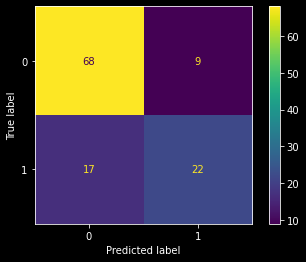

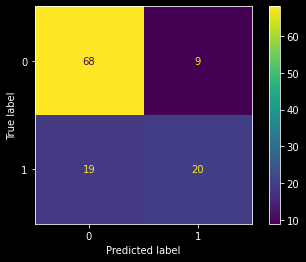

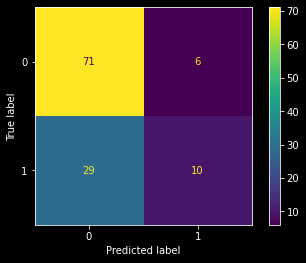

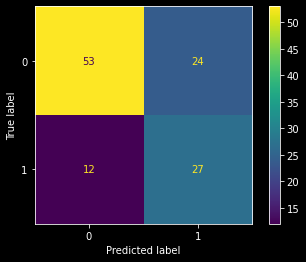

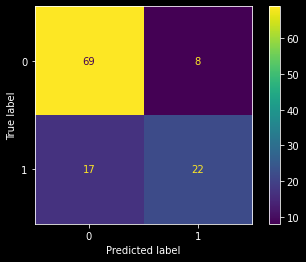

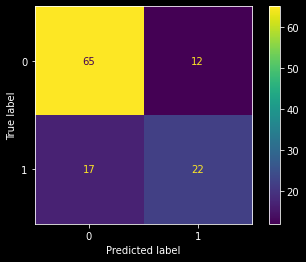

In [91]:
cm_knn.plot()
cm_lr.plot()
cm_mlp.plot()
cm_dt.plot()
cm_svm.plot()
cm_adbst.plot()

plt.show()

This is a medical concern and False Negative might be the key parameter to optimize. The K-Nearest Neighbour method for diabetes classification is working the best out of all approach, with low number of false positive (18) and false negative (10). 